# Import All Necessary Libraries of Python

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics, linear_model
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import Datasets

In [2]:
df=pd.read_csv('swiggy.csv')

In [3]:
df

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63
...,...,...,...,...,...,...,...,...,...,...
8675,464626,Panjarapole Cross Road,Ahmedabad,Malt Pizza,500.0,2.9,80,Pizzas,Navrangpura,40
8676,465835,Rohini,Delhi,Jay Mata Ji Home Kitchen,200.0,2.9,80,South Indian,Rohini,28
8677,465872,Rohini,Delhi,Chinese Kitchen King,150.0,2.9,80,"Chinese,Snacks,Tandoor",Rohini,58
8678,465990,Rohini,Delhi,Shree Ram Paratha Wala,150.0,2.9,80,"North Indian,Indian,Snacks",Rohini,28


In [4]:
df.shape

(8680, 10)

In [5]:
# Return top 5 rows in the Datasets
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [6]:
# Return bottom 5 rows in the Datasets
df.tail()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
8675,464626,Panjarapole Cross Road,Ahmedabad,Malt Pizza,500.0,2.9,80,Pizzas,Navrangpura,40
8676,465835,Rohini,Delhi,Jay Mata Ji Home Kitchen,200.0,2.9,80,South Indian,Rohini,28
8677,465872,Rohini,Delhi,Chinese Kitchen King,150.0,2.9,80,"Chinese,Snacks,Tandoor",Rohini,58
8678,465990,Rohini,Delhi,Shree Ram Paratha Wala,150.0,2.9,80,"North Indian,Indian,Snacks",Rohini,28
8679,466488,Navrangpura,Ahmedabad,Sassy Street,250.0,2.9,80,"Chaat,Snacks,Chinese",Navrangpura,44


# Data Cleaning

In [7]:
# Check for Null values in the Datasets
df.isnull().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

In [8]:
# Check the Datatypes of each column in the Datasets
df.dtypes

ID                 int64
Area              object
City              object
Restaurant        object
Price            float64
Avg ratings      float64
Total ratings      int64
Food type         object
Address           object
Delivery time      int64
dtype: object

In [9]:
for i in df.columns:
    print(i,df[i].sort_values().unique(),'\n', sep='\n')

ID
[   211    221    234 ... 466669 466772 466928]


Area
[' Akhbar Nagar Circle' ' Begumpet' '26' '3Rd Block Jayanagar'
 'A Unit Of M/S Cohort  Ruby Area' 'A.S. Rao Nagar & Sainikpuri' 'Abids'
 'Abids & Koti' 'Acher' 'Adajan' 'Adajan Gam' 'Adajan Patiya'
 'Adarsh Nagar' 'Adikmet' 'Adugodi' 'Afzal Gunj' 'Agarkar Nagar'
 'Ahiritola' 'Ahmedabad' 'Aliabad' 'Alipore' 'Althan' 'Alwarpet'
 'Amarpalli' 'Ambavadi' 'Ambawadi' 'Ambegaon' 'Amberpet' 'Ameerpet'
 'Aminjikarai' 'Amroli' 'Anand Nagar' 'Andheri East' 'Andheri West Area'
 'Anna Nagar' 'Anna Nagar West' 'Anna Nagar West Extension' 'Anna Salai'
 'Annamalai Colony' 'Annanagar' 'Annanagar East' 'Antop Hill'
 'Appa Balwant Chowk Pune' 'Armane Nagar' 'Arumbakkam' 'Asalpha'
 'Ashok Bhai- Citylight' 'Ashok Nagar' 'Ashok Vihar' 'Asif Nagar' 'Athwa'
 'Athwa Gate' 'Athwa Station Road' 'Aundh' 'Ayanavaram' 'Azad Nagar'
 'B.B.D. Bagh' 'Baguiati' 'Baguihati' 'Balaji Nagar' 'Balavinayagar Nagar'
 'Balkampet' 'Bally' 'Ballygunge' 'Banashankari' 'Bandr

# Exploratory Data Analysis(EDA Analysis)

<AxesSubplot:>

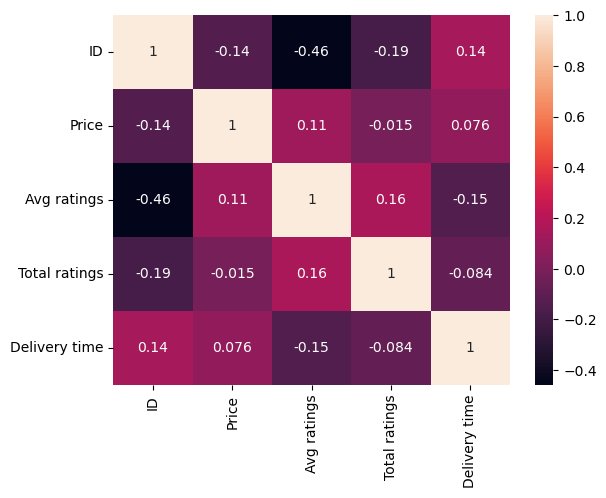

In [10]:
#To check the co-relation of different variables to each other by using heatmap.
sns.heatmap(df.corr(), annot=True)

In [11]:
# Calculate the average price of food item for each of the different cities.
Average_Price_for_Each_City=df.groupby('City')['Price'].mean()
Average_Price_for_Each_City

City
Ahmedabad    318.128312
Bangalore    382.524313
Chennai      356.247740
Delhi        333.301146
Hyderabad    299.926512
Kolkata      362.294205
Mumbai       393.794832
Pune         353.763303
Surat        270.171875
Name: Price, dtype: float64

In [12]:
# Caculate the top 10 highest average rating getting by each restaurant.
Highest_Rating_by_Each_Restaurant=df.groupby('Restaurant')['Avg ratings'].mean().nlargest(10)
Highest_Rating_by_Each_Restaurant

Restaurant
Afresh                                  5.0
Cafe Kokomo                             5.0
Creams & Bites                          5.0
Diamond Market Pizza Jp                 5.0
Fat Tiger                               5.0
Get In My Belly                         5.0
Nivala Apka Apna                        5.0
Shree Krishna Juice Bar                 5.0
Snaxx                                   5.0
Splurge - Thickshakes And Milkshakes    5.0
Name: Avg ratings, dtype: float64

In [13]:
# Filter restaurants with a avg rating greater than 4.5 and delivery time less than 30 minutes.
High_Rated_Restaurants=df[(df['Avg ratings'] > 4.5) & (df['Delivery time'] < 30)]
High_Rated_Restaurants

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
2635,251577,Adikmet,Hyderabad,Euphoria,800.0,4.7,100,Desserts,Himayath Nagar,27
2685,257162,Periyamet,Chennai,The Brooklyn Creamery - Healthy Ice Cream,200.0,4.7,20,"Healthy Food,Desserts,Ice Cream",Vepery,27
4026,365132,Kurla,Mumbai,Kwality Walls Frozen Dessert And Ice Cream Shop,300.0,4.7,100,Ice Cream,Kurla,29
4802,399267,Himayath Nagar,Hyderabad,Swiss Castle,500.0,4.6,100,"Bakery,Sweets,Desserts",Himayath Nagar,28
6470,7003,Himayatnagar,Hyderabad,Almond House,800.0,4.6,500,"Sweets,Desserts,Snacks",Himayath Nagar Road,29
6688,27812,Santacruz East,Mumbai,Natural Ice Cream,150.0,4.7,100,Ice Cream,Kalina Market Santacruz East,27
6717,32443,Shivajinagar,Pune,Natural Ice Cream,150.0,4.7,100,Ice Cream,Opp. Tata Home Finance,28
6736,34415,Shivajinagar,Pune,Frozen Bottle,250.0,4.7,50,"Beverages,Ice Cream,Desserts",Fc Road,29
6818,40847,Gulbai Tekra,Ahmedabad,Havmor Havfunn,250.0,4.6,20,"Ice Cream,Ice Cream Cakes,Desserts",Saffron Tower,25
6856,43931,Santacruz East,Mumbai,Baskin Robbins,350.0,4.7,50,"Ice Cream,Desserts",Opposite Mumbai University Main Gate,29


In [14]:
# Filter which particular area of Bengaluru serves the food items  at lower cost when price less than 100.
Lower_Cost_in_terms_of_food=df[(df['City'] == 'Bangalore') & (df['Price']<100)]
Lower_Cost_in_terms_of_food

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
1206,58568,Ashok Nagar,Bangalore,Sweet Chariot,50.0,2.9,80,Desserts,Brigade Road,36
1941,154343,Basavanagudi,Bangalore,Sandwich Guru,99.0,4.3,100,"Snacks,Beverages",Jayanagar,50
2392,222499,Pulikeshi Nagar,Bangalore,Cane Fresh,50.0,4.4,50,"Indian,Beverages,Desserts",Coles Road,39
3851,355450,Chamrajpet,Bangalore,Kolkata Famous Kati Roll,99.0,2.9,80,"Snacks,Fast Food,Beverages",Basavanagudi,52
4593,389441,Koramangala,Bangalore,The Tasty Planet,70.0,2.9,80,"Beverages,Fast Food,Salads,Snacks",Koramangala,48
7500,128643,Domlur,Bangalore,Kota Kachori And Falahaar,15.0,4.1,1000,"Chaat,North Indian,Snacks,Rajasthani,Sweets,De...",Domlur,50
8231,391694,Frazer Town,Bangalore,Maheshwari Chaats Centre,99.0,2.9,80,"Chaat,Snacks",Frazer Town,49
8393,424609,Jayanagar,Bangalore,Bikaner Sweets,99.0,3.7,20,Sweets,Jayanagar,50
8647,457452,Sanjay Nagar New Bel Road,Bangalore,Sri Ramji Sweets,75.0,2.9,80,Sweets,Sanjay Nagar New Bel Road,51


In [15]:
# Filter the Average delivery time for each restaurant for city?
Average_Delivery_Time=df.groupby(['Restaurant', 'City'])['Delivery time'].mean()
Average_Delivery_Time

Restaurant                        City     
 Conclave At Afraa                Kolkata      75.0
 Hotel Rangda                     Pune         63.0
 Kishori Lal Paan                 Delhi        77.0
 Momozon                          Kolkata      58.0
 Sahadeva Reddy'S Biryani Durbar  Hyderabad    45.0
                                               ... 
Zouq Fusion Foods                 Hyderabad    83.0
Zoya Biriyani                     Kolkata      38.0
Zuka                              Chennai      64.0
Zwarma                            Chennai      62.0
Zyqa Restaurant                   Hyderabad    55.0
Name: Delivery time, Length: 8547, dtype: float64

In [16]:
# Filter the average price of the each food cusines?
Average_Price_of_food=df.groupby('Food type')['Price'].mean()
Average_Price_of_food

Food type
Afghani,Arabian,Indian,Tandoor                            850.000000
Afghani,Biryani                                           400.000000
Afghani,Mughlai                                           300.000000
American                                                  405.714286
American  Beverages  Fast Food                            350.000000
                                                            ...     
Tibetan,Lebanese,Fast Food,Tandoor                        200.000000
Tribal,Seafood,Chinese                                   1200.000000
Turkish                                                   883.333333
Turkish,Arabian                                           300.000000
Turkish,Mediterranean,Middle Eastern,Lebanese,Arabian    1500.000000
Name: Price, Length: 3734, dtype: float64

In [17]:
# Filter what are most popular cuisines among customers?
popular_cuisines=df['Food type'].value_counts().head()
popular_cuisines

Indian          389
Chinese         277
North Indian    246
Fast Food       240
South Indian    228
Name: Food type, dtype: int64

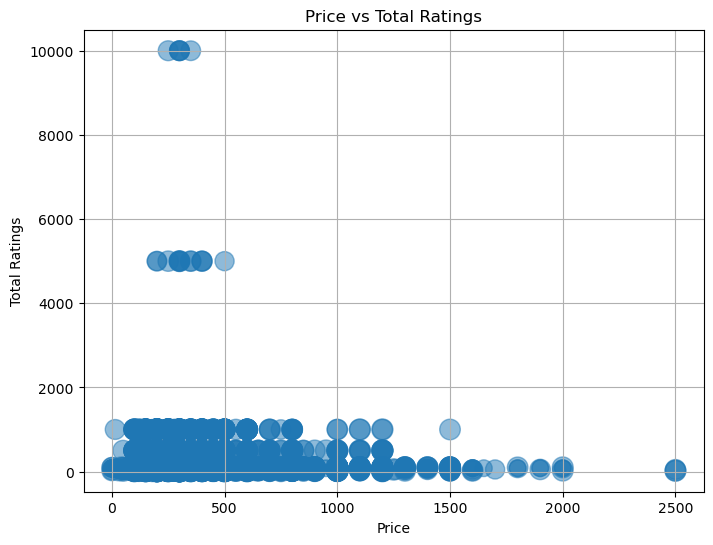

In [18]:
# Create a Scatter plot for Price vs Total ratings
plt.figure(figsize=(8, 6))
plt.scatter(df['Price'], df['Total ratings'], s=df['Avg ratings']*50, alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Total Ratings')
plt.title('Price vs Total Ratings')
plt.grid(True)
plt.show()

Area
Rohini           11466
Chembur          10374
Kothrud           8668
Bidhannagar       8419
Indiranagar       7429
Andheri East      7379
Koramangala       7229
Banjara Hills     6974
Perambur          5455
Lake Town         5398
Name: Delivery time, dtype: int64


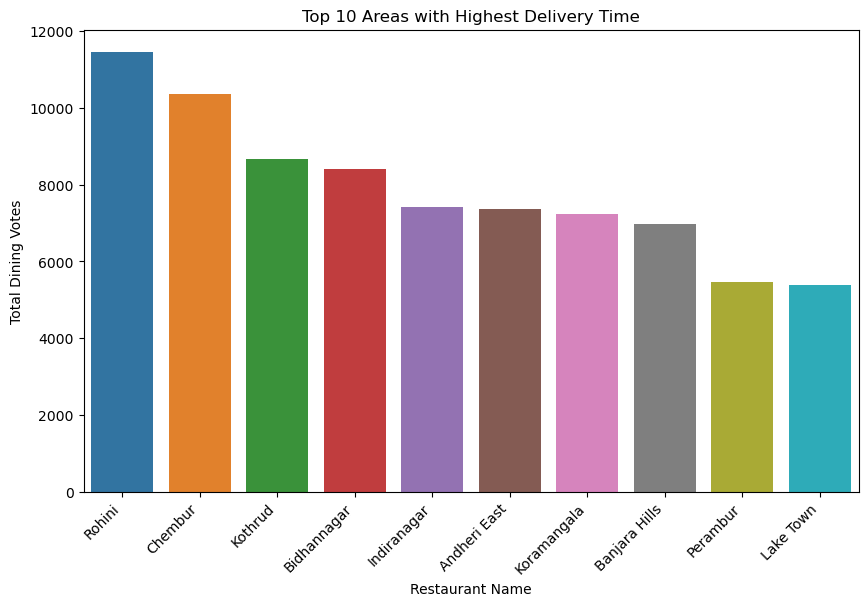

In [19]:
# Create a Top 10 areas with the Highest Delivery time
Top_10_Areas=df.groupby('Area')['Delivery time'].sum().nlargest(10)
print(Top_10_Areas)
plt.figure(figsize=(10,6))
sns.barplot(x=Top_10_Areas.index,y=Top_10_Areas.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Restaurant Name')
plt.ylabel('Total Dining Votes')
plt.title('Top 10 Areas with Highest Delivery Time')
plt.show()

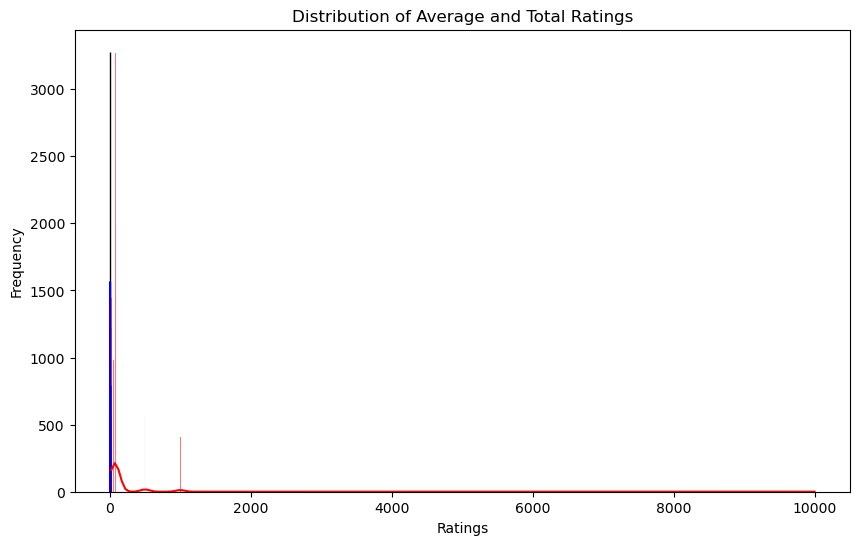

In [20]:
# Distribution of Avg Ratings and Total Ratings
plt.figure(figsize=(10,6))
sns.histplot(df['Avg ratings'], kde=True, color='Blue')
sns.histplot(df['Total ratings'], kde=True, color='Red')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Average and Total Ratings')
plt.show()

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Avg ratings'}>,
        <AxesSubplot:title={'center':'Total ratings'}>],
       [<AxesSubplot:title={'center':'Delivery time'}>, <AxesSubplot:>]],
      dtype=object)

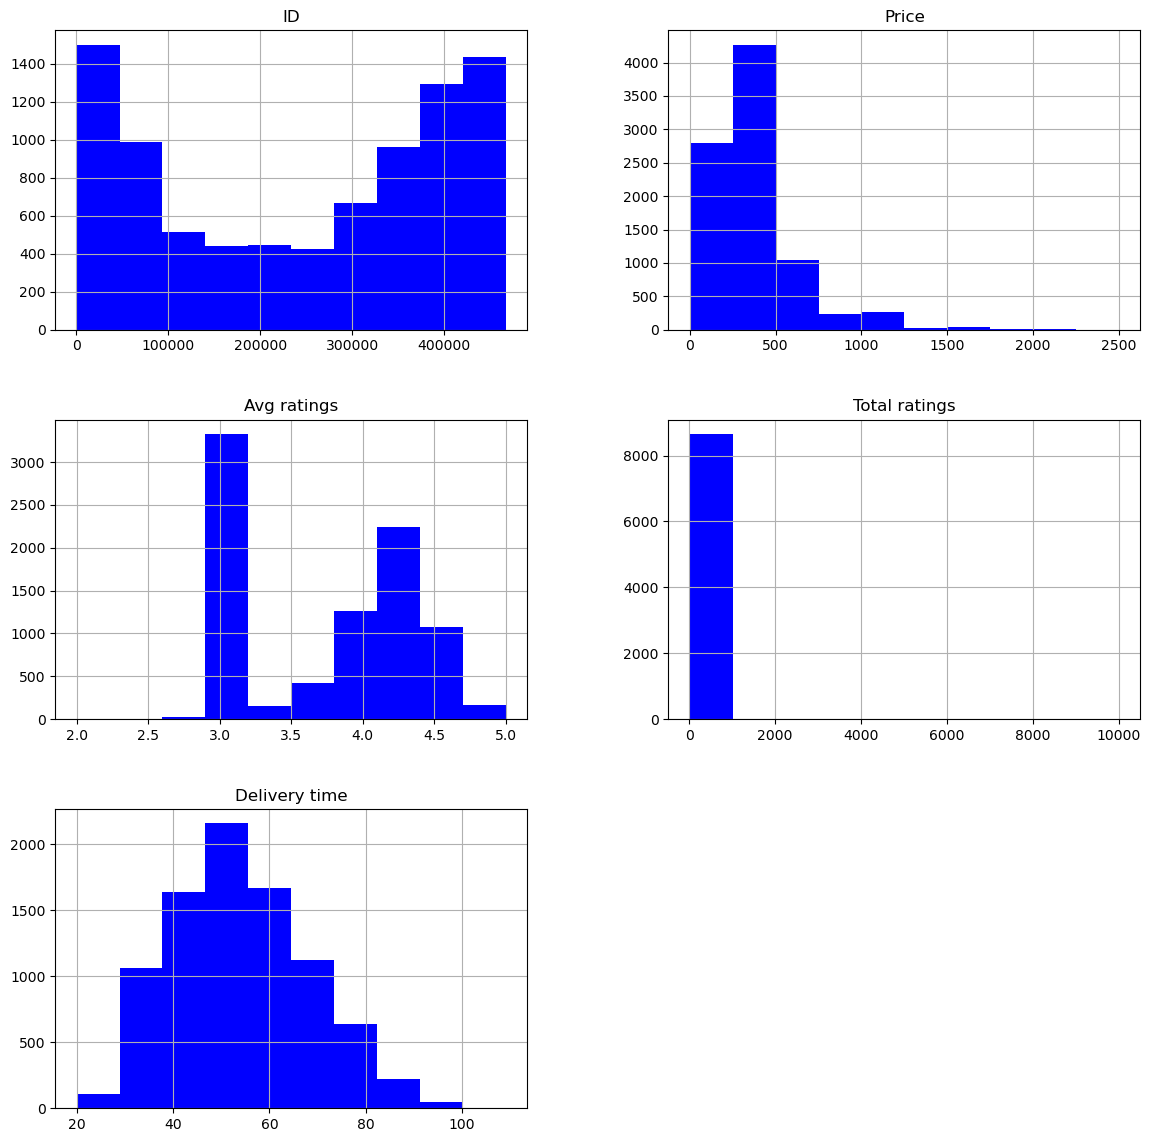

In [21]:
df.hist(figsize=(14,14),color='Blue')

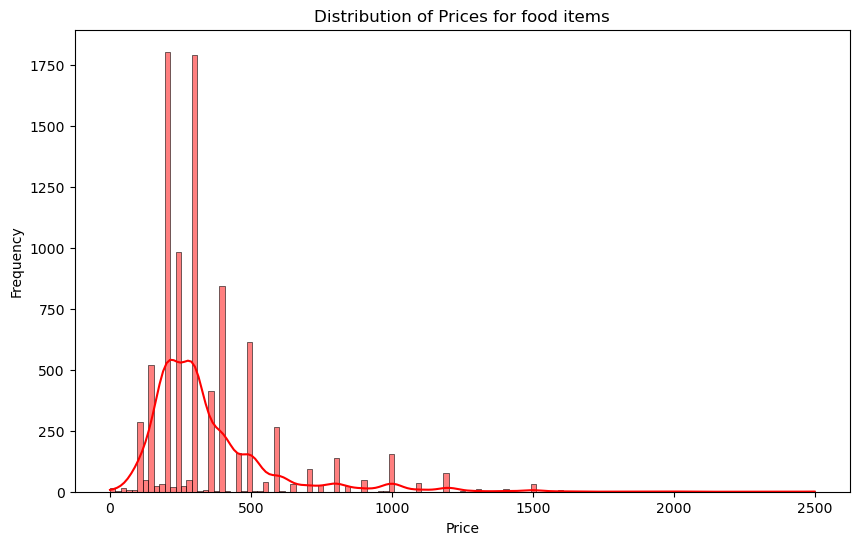

In [22]:
# Distribution of Prices for food items
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], kde=True, color='Red')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices for food items')
plt.show()

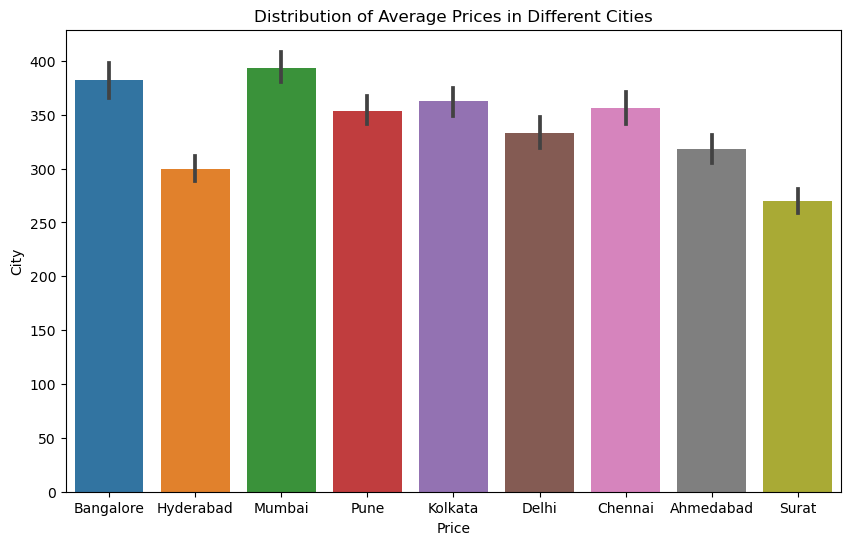

In [23]:
# Average Prices for in Different Cities
plt.figure(figsize=(10,6))
sns.barplot(x='City', y='Price',data=df)
plt.xlabel('Price')
plt.ylabel('City')
plt.title('Distribution of Average Prices in Different Cities')
plt.show()

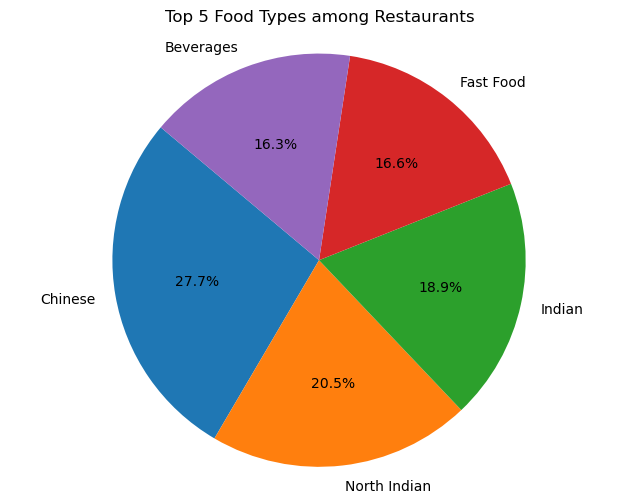

In [24]:
# Count the occurrences of each food type among all restaurants
food_type_counts=df['Food type'].str.split(',', expand=True).stack().value_counts()
# Select the top 5 food types
top_5_food_types=food_type_counts.head(5)
# Pie chart for top 5 Restaurants by food types
plt.figure(figsize=(8,6))
plt.pie(top_5_food_types, labels=top_5_food_types.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 5 Food Types among Restaurants')
plt.show()

In [25]:
# Separete the Categorical Column and Numberical Column
cat=[]
num=[]
for i in df.columns:
    if df[i].dtypes=="O":
        cat.append(i)
    else:
        num.append(i)

In [26]:
cat

['Area', 'City', 'Restaurant', 'Food type', 'Address']

In [27]:
num

['ID', 'Price', 'Avg ratings', 'Total ratings', 'Delivery time']

In [28]:
num.remove('Price')

In [29]:
# Stastical Summary of Datasets
df.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


# Outliers Handling

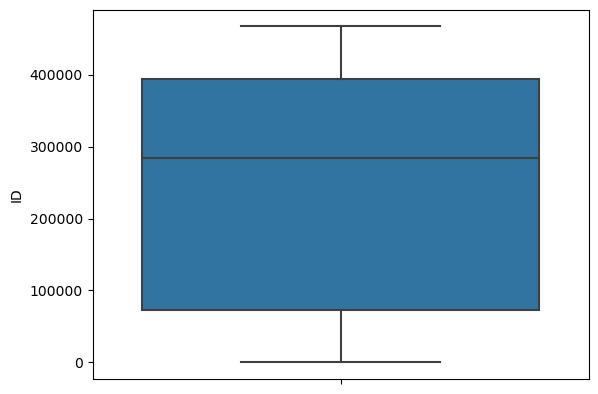

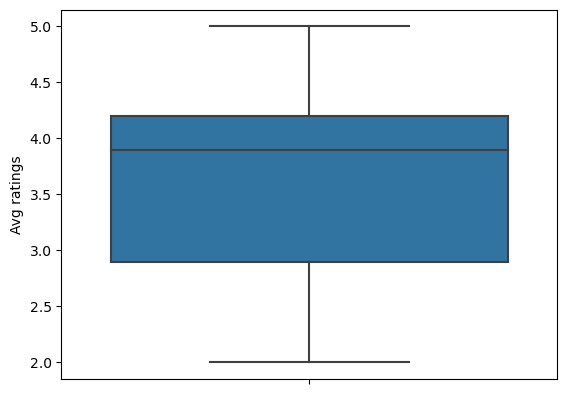

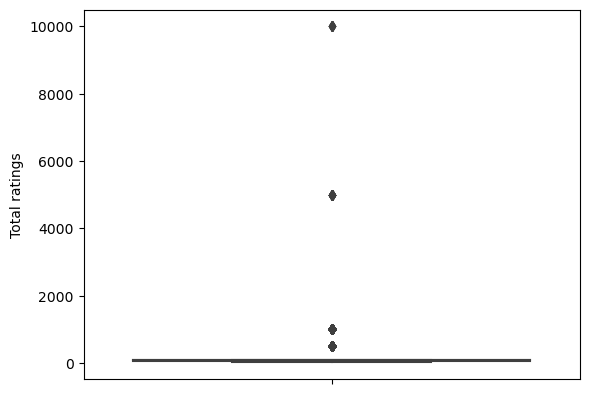

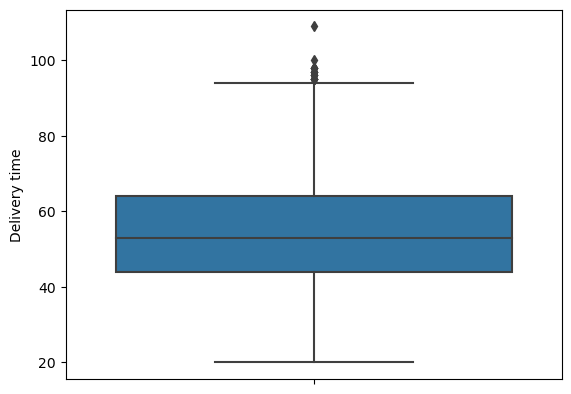

In [30]:
for i in num:
    plt.figure()
    sns.boxplot(y=i, data=df)

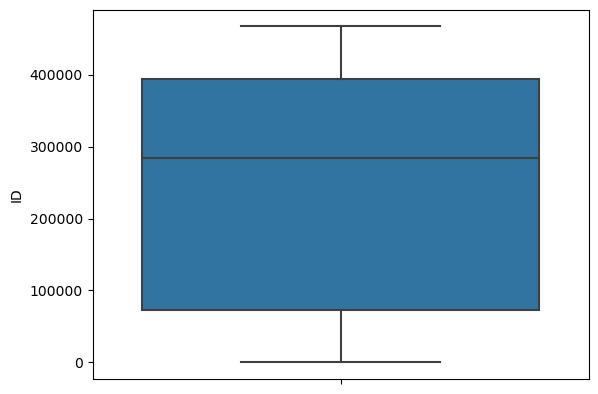

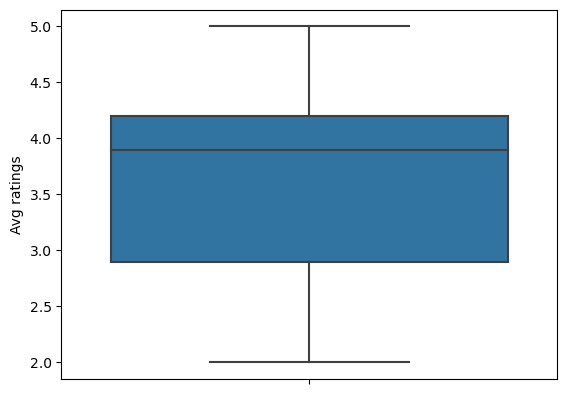

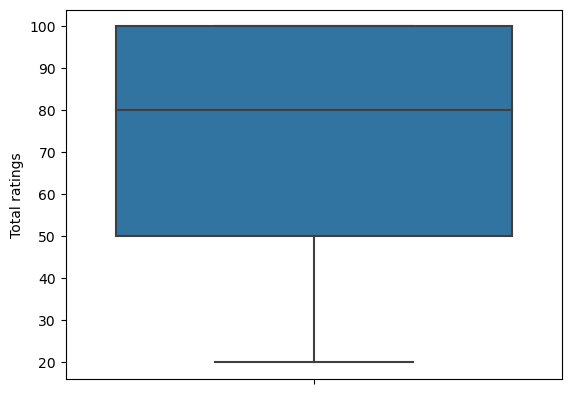

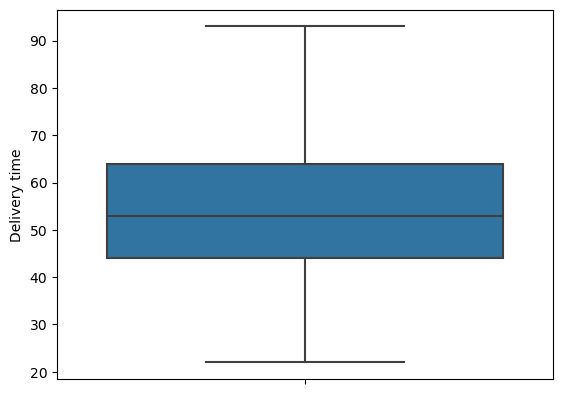

In [31]:
for i in num:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ll=q1-1.5*iqr
    ul=q3+1.5*iqr
    df=df[(df[i] > ll) & (df[i] < ul)]
    plt.figure()
    sns.boxplot(y=i, data=df)

In [32]:
df.shape

(7653, 10)

# Data Preprocessing

In [33]:
# Scaling the Datasets
sc=StandardScaler()

In [34]:
df[num]=sc.fit_transform(df[num])

In [35]:
df

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,-1.675983,Koramangala,Bangalore,Tandoor Hut,300.0,1.240651,1.060209,"Biryani,Chinese,North Indian,South Indian",5Th Block,0.334103
1,-1.675918,Koramangala,Bangalore,Tunday Kababi,300.0,0.781600,1.060209,"Mughlai,Lucknowi",5Th Block,0.120328
2,-1.675758,Jogupalya,Bangalore,Kim Lee,650.0,1.240651,1.060209,Chinese,Double Road,-0.307222
4,-1.675738,Indiranagar,Bangalore,Nh8,350.0,0.628583,-0.712132,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,0.619136
5,-1.675706,Indiranagar,Bangalore,Treat,800.0,1.393668,1.060209,"Mughlai,North Indian",100 Feet Road,0.120328
...,...,...,...,...,...,...,...,...,...,...
8675,1.311832,Panjarapole Cross Road,Ahmedabad,Malt Pizza,500.0,-1.054604,0.351272,Pizzas,Navrangpura,-1.019805
8676,1.319610,Rohini,Delhi,Jay Mata Ji Home Kitchen,200.0,-1.054604,0.351272,South Indian,Rohini,-1.874904
8677,1.319848,Rohini,Delhi,Chinese Kitchen King,150.0,-1.054604,0.351272,"Chinese,Snacks,Tandoor",Rohini,0.262845
8678,1.320607,Rohini,Delhi,Shree Ram Paratha Wala,150.0,-1.054604,0.351272,"North Indian,Indian,Snacks",Rohini,-1.874904


In [36]:
# Encode the Datasets
df_new=pd.get_dummies(df, columns=cat, drop_first=True)

In [37]:
df_new

,ID,Price,Avg ratings,Total ratings,Delivery time,Area_ Begumpet,Area_26,Area_A.S. Rao Nagar & Sainikpuri,Area_Abids,Area_Abids & Koti,...,Address_Yash Plaza,Address_Yerawada,Address_Yerwada,Address_Yeshwanthpura,Address_Yewalewadi,Address_Ymca Circle,Address_Yogi Chowk,Address_Yums Panjrapole,Address_Zahra Nagar,Address_Zampa Bazar
0,-1.675983,300.0,1.240651,1.060209,0.334103,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.675918,300.0,0.781600,1.060209,0.120328,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.675758,650.0,1.240651,1.060209,-0.307222,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.675738,350.0,0.628583,-0.712132,0.619136,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-1.675706,800.0,1.393668,1.060209,0.120328,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8675,1.311832,500.0,-1.054604,0.351272,-1.019805,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8676,1.319610,200.0,-1.054604,0.351272,-1.874904,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8677,1.319848,150.0,-1.054604,0.351272,0.262845,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8678,1.320607,150.0,-1.054604,0.351272,-1.874904,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Prepare The Data for Modeling
x=df_new.drop('Price', axis=1)
y=df_new['Price']

In [39]:
# Split the Data into training and testing sets(75% train, 25% test)
X_train, X_test, Y_train, Y_test=train_test_split(x, y, test_size=0.25)

In [40]:
# Create LinearRegression Model
model=LinearRegression()

In [41]:
# Train the LinearRegression Model
model.fit(X_train, Y_train)

LinearRegression()

In [42]:
# Predict the test set
Y_pred=model.predict(X_test)

In [43]:
# Effect on  Model Evaluation matrics
mse=metrics.mean_squared_error(Y_test, Y_pred)
rmse=np.sqrt(mse)
r2_score=metrics.r2_score(Y_test, Y_pred)

In [44]:
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-Squared:', r2_score)

Mean Squared Error: 2.0256383842149286e+27
Root Mean Squared Error: 45007092598999.65
R-Squared: -3.363533503232453e+22
